<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/MLClassificationAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervised Learning Algorithms 

We will use the [Palmer's Penguins dataset](https://github.com/allisonhorst/palmerpenguins) and create different models for classifying the dataset by species. 

We will use the [scikit-learn library](https://scikit-learn.org/stable/index.html) functions for [Supervised learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) cases. 


In [ ]:
# Basic libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm 

# Visualization libraries
import matplotlib.pyplot as plt 
import plotly.express as px  
import seaborn as sns 

# Specific scikit-learn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,roc_auc_score 
#import sklearn.metrics 


import warnings 
warnings.filterwarnings('ignore')


In [ ]:
# Read the Penguins dataset fom Github
filename = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/penguins/penguins_size.csv"
df_dist = pd.read_csv(filename)
df_dist.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Data cleaning and manipulation
Check for missimg values and appropriatedata type of the variables

In [ ]:
# Inquiry about the state of the original dataset
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Check if any missing values
df_dist.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [ ]:
# Eliminate the rows with mising values, and define a new dataframe df
df = df_dist.dropna(axis = 0, how ='any')

In [ ]:
# Should have a clean dataframe with no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


### Label encoding of categorical variables using the built-in function LabelEncoder()

The categorial variables are:
- species
- island
- sex

In [ ]:
# See the different values of the above variables
print('Species: \n', df.species.value_counts())
print('Island: \n', df.island.value_counts())
print('Gender: \n', df.sex.value_counts())


Species: 
  Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64
Island: 
 Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64
Gender: 
 MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64


There is a row hwre the gender of the penguin has value of ".", then we need to eliminte that row, using a filter condition. 

In [ ]:
# Keep or filter out all rows where the sex of the Penguins are not equal to '.'
df = df[df.sex != '.'] 
print('Gender: \n', df.sex.value_counts())

Gender: 
 MALE      168
FEMALE    165
Name: sex, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [ ]:
# Ready to encode categorical variables (encode names with values)
le = LabelEncoder()

df['species_encoded']= le.fit_transform(df['species'])
df['island_encoded']= le.fit_transform(df['island'])
df['sex_encoded']= le.fit_transform(df['sex'])
print(df.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  species_encoded  island_encoded  sex_encoded  
0       3750.0    MALE                0               2            1  
1       3800.0  FEMALE                0               2            0  
2       3250.0  FEMALE                0               2            0  
4       3450.0  FEMALE                0               2            0  
5       3650.0    MALE                0               2            1  


## Check for outliers in dataset

Tukey also gives a criteria for defining outlier data. If Q1, and Q3 are the first and third quartile positions, the interquartile range IQR = Q3 - Q1 , then an outlier value will fall below Q1 - 1.5 IQR or above Q3 + 1.5 IQR.

We can define an additional Tukey outer fences, lower outer fence Q1 - 3.0 IQR and the upper outer fence above Q3 + 3.0 IQR.



In [ ]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    ifl, ifu = inner_fence_le, inner_fence_ue
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    ofl, ofu = outer_fence_le, outer_fence_ue
    
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss, ifl, ifu, ofl, ofu
 
     

In [ ]:
# Check for putliers in each numeric variable: culmen length

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'culmen_length_mm')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


In [ ]:
# Check for putliers in each numeric variable: culmen depth

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'culmen_depth_mm')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


In [ ]:
# Check for putliers in each numeric variable: flipper length

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'flipper_length_mm')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


In [ ]:
# Check for putliers in each numeric variable: body mass

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'body_mass_g')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


There are no outliers

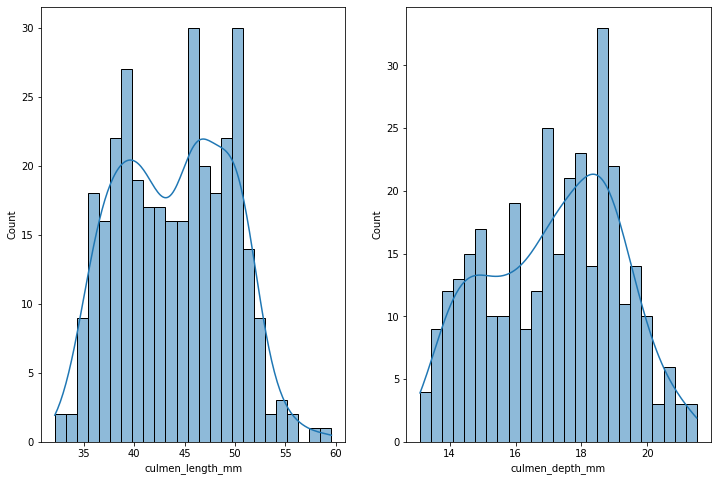

In [ ]:
# Plot data frequency distribution for first two variables

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

sns.histplot(df['culmen_length_mm'], bins=25, kde=True, ax=ax1);
sns.histplot(df['culmen_depth_mm'], bins=25, kde=True, ax=ax2);
plt.show()

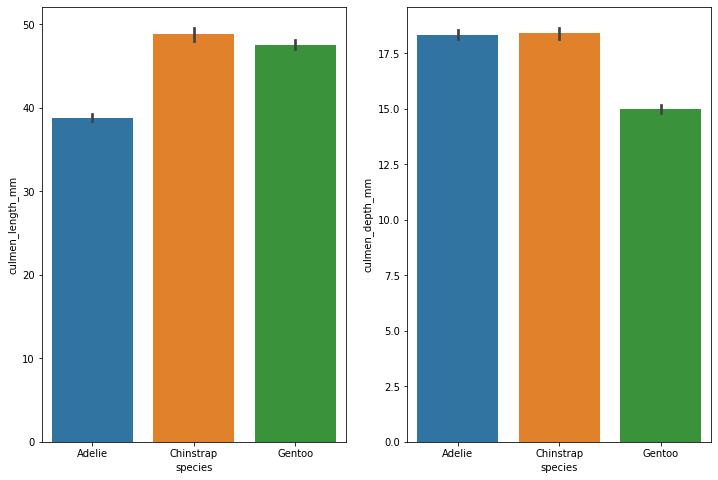

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

sns.barplot(x='species', y='culmen_length_mm', data=df, ax=ax1)
sns.barplot(x='species', y='culmen_depth_mm', data=df, ax=ax2)

plt.show()


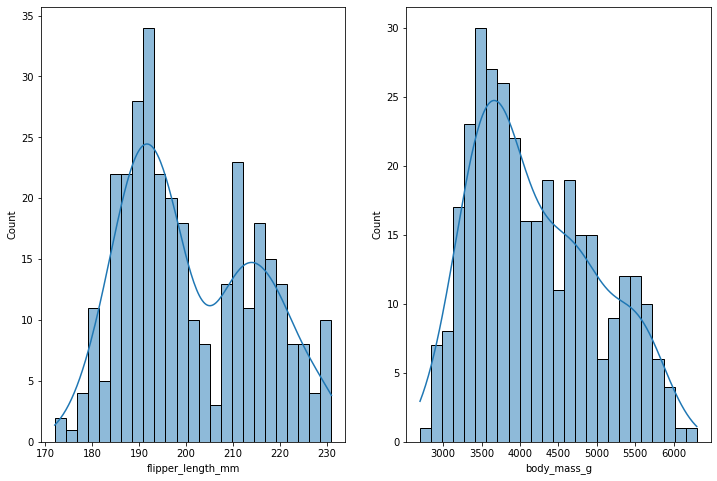

In [ ]:
# Plot data frequency distribution for last two variables

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

sns.histplot(df['flipper_length_mm'], bins=25, kde=True, ax=ax1);
sns.histplot(df['body_mass_g'], bins=25, kde=True, ax=ax2);
plt.show()


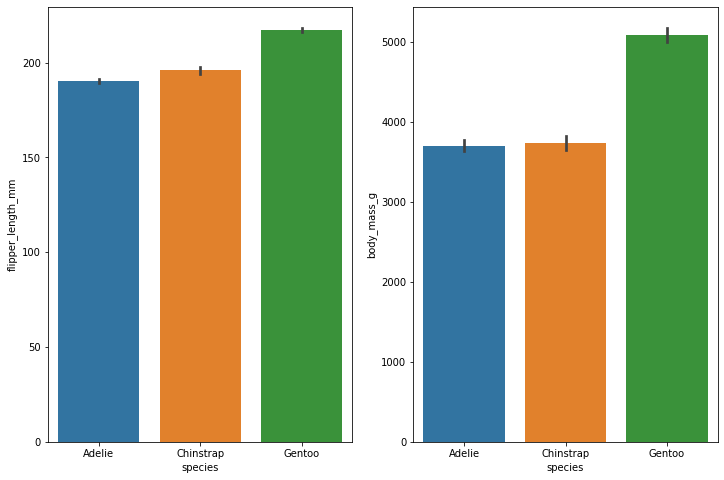

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

sns.barplot(x='species', y='flipper_length_mm', data=df, ax=ax1)
sns.barplot(x='species', y='body_mass_g', data=df, ax=ax2)

plt.show()


## Splitting the data into Training & Testing datasets

In [ ]:
features=['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g','island_encoded', 'sex_encoded']

x=df[features]# since these are the features we take them as x
y=df['species_encoded']# since species is the output or label we'll take it as y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)

print("\nShape of x_train:\n{}".format(x_train.shape))
print("\nShape of x_test:\n{}".format(x_test.shape))
print("\nShape of y_train:\n{}".format(y_train.shape))
print("\nShape of y_test:\n{}".format(y_test.shape))



Shape of x_train:
(266, 6)

Shape of x_test:
(67, 6)

Shape of y_train:
(266,)

Shape of y_test:
(67,)


## Scaling

In [ ]:

sc = StandardScaler()

scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

print(x_train)
print("____________________________________________________________________________")
print("",scaled_x_train)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
230              40.9             13.7              214.0       4650.0   
84               37.3             17.8              191.0       3350.0   
303              50.0             15.9              224.0       5350.0   
22               35.9             19.2              189.0       3800.0   
29               40.5             18.9              180.0       3950.0   
..                ...              ...                ...          ...   
194              50.9             19.1              196.0       3550.0   
77               37.2             19.4              184.0       3900.0   
112              39.7             17.7              193.0       3200.0   
277              45.5             15.0              220.0       5000.0   
108              38.1             17.0              181.0       3175.0   

     island_encoded  sex_encoded  
230               0            0  
84                1            0  
303   

## Train the model

In [ ]:
#KNN model
x_train=scaled_x_train
x_test=scaled_x_test

model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train, y_train)
y_prediction1= model1.predict(x_test)

report=pd.DataFrame()
report['Actual values']=y_test
report['Predicted values KNN']= y_prediction1
print(report)

#Decision tree
model2= DecisionTreeClassifier()
model2 = model2.fit(x_train,y_train)
#Predict the response for test dataset
y_prediction2 = model2.predict(x_test)
report['Predicted values Decision tree']= y_prediction2
print(report)

#SVM
model3= svm.SVC(kernel='linear',probability=True) # Linear Kernel
model3.fit(x_train, y_train)
#Predict the response for test dataset
y_prediction3 = model3.predict(x_test)
report['Predicted values SVM']= y_prediction3
print(report)


     Actual values  Predicted values KNN
30               0                     1
317              2                     2
79               0                     0
201              1                     1
63               0                     0
..             ...                   ...
288              2                     2
4                0                     0
83               0                     0
319              2                     2
66               0                     0

[67 rows x 2 columns]
     Actual values  Predicted values KNN  Predicted values Decision tree
30               0                     1                               0
317              2                     2                               2
79               0                     0                               0
201              1                     1                               1
63               0                     0                               0
..             ...                   ...       

### Model evaluation

In [ ]:
ConfusionMatrix1=confusion_matrix(y_test,y_prediction1)
print(ConfusionMatrix1)

ConfusionMatrix2=confusion_matrix(y_test,y_prediction2)
print(ConfusionMatrix2)

ConfusionMatrix3=confusion_matrix(y_test,y_prediction3)
print(ConfusionMatrix3)


[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]
[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


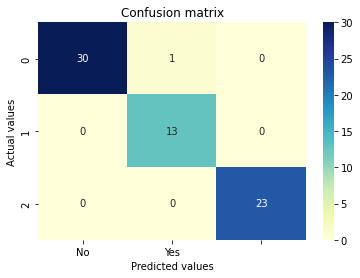

In [ ]:
# Heatmap of First Confusion Matrix
ax=sns.heatmap(ConfusionMatrix1,annot=True,cmap="YlGnBu")
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
#Ticket labels:
ax.xaxis.set_ticklabels(['No','Yes'])
ax.xaxis.set_ticklabels(['No','Yes'])
plt.show()


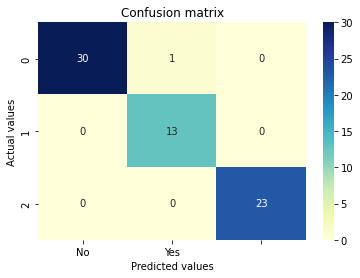

In [ ]:
# Second Confusion Matrix

ax=sns.heatmap(ConfusionMatrix2,annot=True,cmap="YlGnBu")
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
#Ticket labels:
ax.xaxis.set_ticklabels(['No','Yes'])
ax.xaxis.set_ticklabels(['No','Yes'])
plt.show()

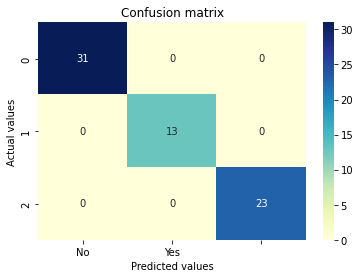

In [ ]:
# Third Confusion Matrix (SVC)

ax=sns.heatmap(ConfusionMatrix3,annot=True,cmap="YlGnBu")
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
#Ticket labels:
ax.xaxis.set_ticklabels(['No','Yes'])
ax.xaxis.set_ticklabels(['No','Yes'])
plt.show()


## ROC Scores and Curve 

In [ ]:
#roc auc score
roc_auc_score(y_test, y_pred_prob1, multi_class='ovo', average='weighted')
roc_auc_score(y_test, y_pred_prob2, multi_class='ovo', average='weighted')
roc_auc_score(y_test, y_pred_prob3, multi_class='ovo', average='weighted')
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='black', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Descision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show();


NameError: ignored